# Decreasing Trend

In [1]:
!pip install khayyam
!pip install unidecode

     |████████████████████████████████| 46 kB 1.2 MB/s 
  Created wheel for khayyam: filename=Khayyam-3.0.17-cp37-cp37m-linux_x86_64.whl size=74594 sha256=0c7cff4c428720d4862bae787607bafb46ae0c8c52aa122bfcf66a4ca0b3f693
  Stored in directory: /root/.cache/pip/wheels/5c/27/04/a40f5c44518210fbd57f8a2045ee50f835bcb75fe884daca06
Successfully built khayyam
     |████████████████████████████████| 235 kB 5.1 MB/s 


In [2]:
pip install 'openpyxl==3.0.0'

     |████████████████████████████████| 172 kB 5.3 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=cda5d3596743fe1fc081b0272c20ab01a3c01b168f119a9bc424213770650760
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from numpy import array

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
import tensorflow as tf

from itertools import cycle
from khayyam import *
from datetime import date, datetime
import datetime as dt
from unidecode import unidecode
# ! pip install plotly

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
khazar = pd.read_csv('/content/drive/MyDrive/SN/Final/final__/khazar.csv')
khazar

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI
0,46790.0,46790.0,46790.0,47690.0,1400-1-7,خزر,54147,2021-03-27,NaN,47690.000000,NaN
1,46740.0,46740.0,46740.0,47680.0,1400-1-8,خزر,11775,2021-03-28,NaN,47684.000000,NaN
2,45780.0,45780.0,45780.0,47610.0,1400-1-10,خزر,38078,2021-03-30,NaN,47648.947368,NaN
3,46660.0,46660.0,46660.0,47600.0,1400-1-11,خزر,11229,2021-03-31,NaN,47628.615385,NaN
4,46650.0,46650.0,46650.0,47590.0,1400-1-14,خزر,11683,2021-04-03,47634.0,47613.791469,NaN
...,...,...,...,...,...,...,...,...,...,...,...
181,9570.0,8810.0,9580.0,9070.0,1400-10-27,خزر,4109608,2022-01-17,9256.0,9239.229112,40.841114
182,8890.0,8620.0,8890.0,8650.0,1400-10-28,خزر,2078213,2022-01-18,9066.0,9042.819408,36.150925
183,8340.0,8230.0,8720.0,8410.0,1400-10-29,خزر,3142764,2022-01-19,8876.0,8831.879605,33.764746
184,8540.0,8050.0,8700.0,8310.0,1400-11-2,خزر,2465315,2022-01-22,8742.0,8657.919737,32.793466


In [6]:
khazar_social = pd.read_excel('/content/drive/MyDrive/SN/Final/social_data/خزر.xlsx')
khazar_social

,date and time,view
0,۰۱:۰۷:۵۸ ۱۴۰۰/۰۱/۰۲,600
1,۱۱:۵۶:۵۹ ۱۴۰۰/۰۱/۰۲,415
2,۱۲:۵۰:۵۱ ۱۴۰۰/۰۱/۰۲,4
3,۱۲:۵۱:۰۳ ۱۴۰۰/۰۱/۰۲,18
4,۱۲:۵۴:۳۱ ۱۴۰۰/۰۱/۰۲,21544
...,...,...
8105,۱۲:۲۴:۵۰ ۱۴۰۰/۱۱/۰۳,3
8106,۱۲:۳۹:۳۷ ۱۴۰۰/۱۱/۰۳,107
8107,۱۲:۳۹:۴۸ ۱۴۰۰/۱۱/۰۳,134
8108,۱۳:۱۹:۰۷ ۱۴۰۰/۱۱/۰۳,572


In [7]:
khazar_social.columns = ['date and time', 'view']
khazar_social['presian_date'] = khazar_social['date and time'].apply(lambda x: x.split(" ")[1])
khazar_social['gregorian_date'] = khazar_social['presian_date'].apply(lambda x: JalaliDate(int(unidecode(x.split("/")[0])), int(unidecode(x.split("/")[1])), int(unidecode(x.split("/")[2]))).todate())
khazar_social = khazar_social[['gregorian_date', 'view']]
khazar_social = khazar_social.groupby(by='gregorian_date').mean()
khazar_social['gregorian_date'] = khazar_social.index
khazar_social['gregorian_date'] = khazar_social['gregorian_date'].astype(str)
khazar_social['index'] = [i for i in range(len(khazar_social))]
khazar_social.set_index('index', inplace=True)
khazar_social

,view,gregorian_date
index,,
0,2347.250000,2021-03-22
1,210.000000,2021-03-23
2,140.000000,2021-03-25
3,201.500000,2021-03-26
4,4328.071429,2021-03-27
...,...,...
296,1729.473684,2022-01-19
297,2777.500000,2022-01-20
298,5445.750000,2022-01-21


# Merging

In [8]:
khazar_df=pd.merge(khazar,khazar_social, on='gregorian_date', how='inner')
khazar_df

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI,view
0,46790.0,46790.0,46790.0,47690.0,1400-1-7,خزر,54147,2021-03-27,NaN,47690.000000,NaN,4328.071429
1,46740.0,46740.0,46740.0,47680.0,1400-1-8,خزر,11775,2021-03-28,NaN,47684.000000,NaN,1682.954545
2,45780.0,45780.0,45780.0,47610.0,1400-1-10,خزر,38078,2021-03-30,NaN,47648.947368,NaN,1423.343750
3,46660.0,46660.0,46660.0,47600.0,1400-1-11,خزر,11229,2021-03-31,NaN,47628.615385,NaN,745.833333
4,46650.0,46650.0,46650.0,47590.0,1400-1-14,خزر,11683,2021-04-03,47634.0,47613.791469,NaN,4240.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
181,9570.0,8810.0,9580.0,9070.0,1400-10-27,خزر,4109608,2022-01-17,9256.0,9239.229112,40.841114,793.666667
182,8890.0,8620.0,8890.0,8650.0,1400-10-28,خزر,2078213,2022-01-18,9066.0,9042.819408,36.150925,117.833333
183,8340.0,8230.0,8720.0,8410.0,1400-10-29,خزر,3142764,2022-01-19,8876.0,8831.879605,33.764746,1729.473684
184,8540.0,8050.0,8700.0,8310.0,1400-11-2,خزر,2465315,2022-01-22,8742.0,8657.919737,32.793466,975.454545


In [ ]:
# k = khaperes_df['view'].ewm(span=10, adjust=False, min_periods=12).mean()
# # Get the 12-day EMA of the closing price
# d = khaperes_df['view'].ewm(span=22, adjust=False, min_periods=26).mean()
# # Subtract the 26-day EMA from the 12-Day EMA to get the MACD
# macd = k - d
# # Get the 9-Day EMA of the MACD for the Trigger line
# macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
# # Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
# macd_h = macd - macd_s
# # Add all of our new values for the MACD to the dataframe
# khaperes_df['macd'] = khaperes_df.index.map(macd)
# khaperes_df['macd_h'] = khaperes_df.index.map(macd_h)
# khaperes_df['macd_s'] = khaperes_df.index.map(macd_s)
# # View our data
# pd.set_option("display.max_columns", None)
# khaperes_df

In [9]:
def computeRSI (data, time_window):
    oneday = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    gain = 0 * oneday
    loss = 0 * oneday
    
    # up change is equal to the positive difference, otherwise equal to zero
    gain[oneday > 0] = oneday[ oneday>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    loss[oneday < 0] = oneday[ oneday < 0 ]
    
    # check pandas documentation for ewm
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    gain_avg   = gain.ewm(com=time_window-1 , min_periods=time_window).mean() #gainavg  is average gain over time window (period)
    loss_avg = loss.ewm(com=time_window-1 , min_periods=time_window).mean() #lossavg  is average loss over time window (period)
    
    rs = abs(gain_avg/loss_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [10]:
khazar_df['view'] = khazar_df['view'].to_frame()
khazar_df['SMA5_view'] = khazar_df['view'].rolling(5).mean()
khazar_df['EWMA5_view'] = khazar_df['view'].ewm(span=5).mean()
khazar_df['RSI_view'] = computeRSI(khazar_df['view'], 14)

In [11]:
khazar_df

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI,view,SMA5_view,EWMA5_view,RSI_view
0,46790.0,46790.0,46790.0,47690.0,1400-1-7,خزر,54147,2021-03-27,NaN,47690.000000,NaN,4328.071429,NaN,4328.071429,NaN
1,46740.0,46740.0,46740.0,47680.0,1400-1-8,خزر,11775,2021-03-28,NaN,47684.000000,NaN,1682.954545,NaN,2741.001299,NaN
2,45780.0,45780.0,45780.0,47610.0,1400-1-10,خزر,38078,2021-03-30,NaN,47648.947368,NaN,1423.343750,NaN,2116.847723,NaN
3,46660.0,46660.0,46660.0,47600.0,1400-1-11,خزر,11229,2021-03-31,NaN,47628.615385,NaN,745.833333,NaN,1547.349438,NaN
4,46650.0,46650.0,46650.0,47590.0,1400-1-14,خزر,11683,2021-04-03,47634.0,47613.791469,NaN,4240.000000,2484.040611,2581.020981,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,9570.0,8810.0,9580.0,9070.0,1400-10-27,خزر,4109608,2022-01-17,9256.0,9239.229112,40.841114,793.666667,754.755588,675.975904,51.441246
182,8890.0,8620.0,8890.0,8650.0,1400-10-28,خزر,2078213,2022-01-18,9066.0,9042.819408,36.150925,117.833333,533.239901,489.928381,45.520594
183,8340.0,8230.0,8720.0,8410.0,1400-10-29,خزر,3142764,2022-01-19,8876.0,8831.879605,33.764746,1729.473684,717.227972,903.110148,57.949710
184,8540.0,8050.0,8700.0,8310.0,1400-11-2,خزر,2465315,2022-01-22,8742.0,8657.919737,32.793466,975.454545,868.587972,927.224947,51.975192


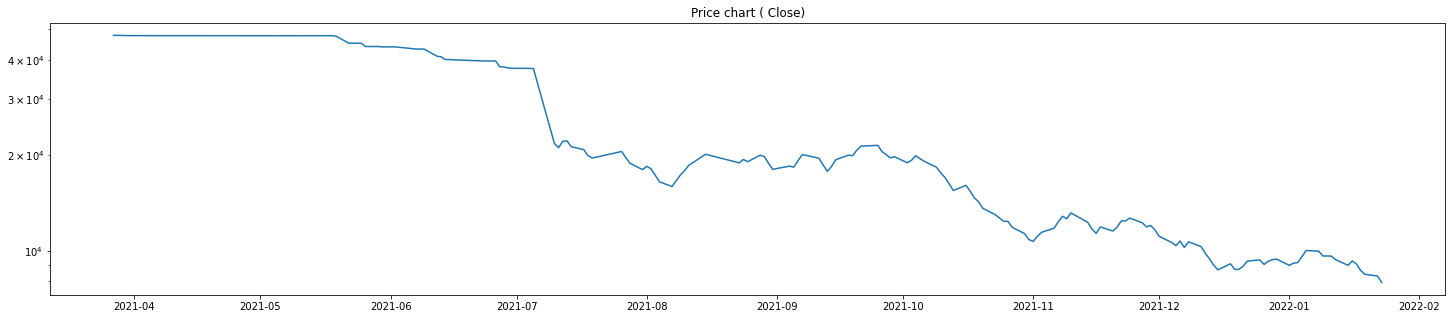

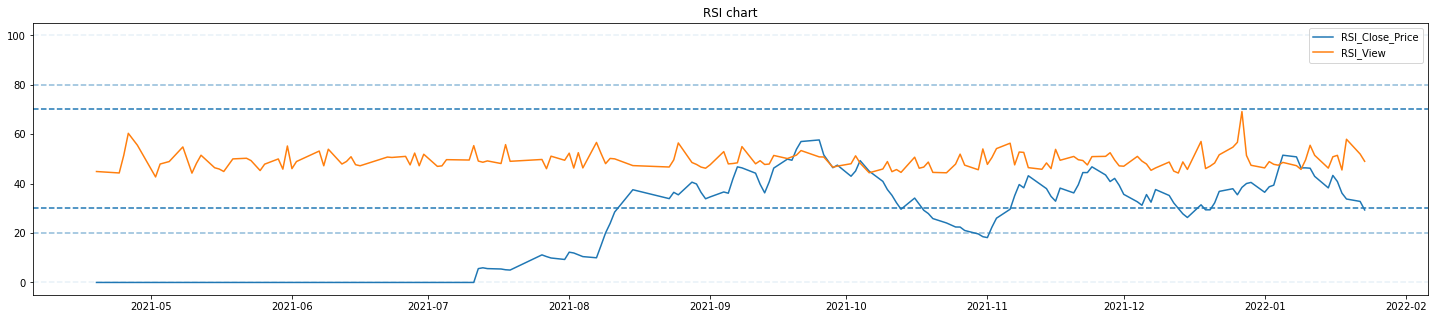

In [13]:
plt.figure(figsize=(25,5))
khazar_df['date'] = pd.to_datetime(khazar_df['gregorian_date'], format = '%Y-%m-%d')
plt.plot(khazar_df['date'], khazar_df['Close'],label='Close_Price')
plt.title('Price chart ( Close)')
plt.yscale("log")
plt.show()
plt.figure(figsize=(25,5))
plt.title('RSI chart')
plt.plot(khazar_df['date'], khazar_df['RSI'],label='RSI_Close_Price')
plt.plot(khazar_df['date'], khazar_df['RSI_view'],label='RSI_View')
plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')
plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.legend()
plt.show()

# RSI

In [14]:
# Force lowercase (optional)
khazar_df.columns = [x.lower() for x in khazar_df.columns]
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logarithmic Scale","Default Scale"))
# close price
fig.append_trace(
    go.Scatter(
        x=khazar_df['gregorian_date'],
        y=(khazar_df['close']),
        line=dict(color='#ff9900', width=1),
        name='Close',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=khazar_df['gregorian_date'],
        y=khazar_df['rsi'],
        line=dict(color='#ff9900', width=2),
        name='RSI_Close',
        
        legendgroup='2',

    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=khazar_df['gregorian_date'],
        y=khazar_df['rsi_view'],
        line=dict(color='black', width=2),
        name='RSI_View',

        legendgroup='2',
        
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=18,
     width=1500,
     height=900
    # xaxis=dict(
    #     rangeslider=dict(
    #         visible=False
        )
    

# Update options and show plot
fig.update_yaxes( type="log", row=1, col=1)

fig.update_layout(layout)

fig.show()

# SMA

In [15]:
khazar_df.columns = [x.lower() for x in khazar_df.columns]
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logarithmic Scale","Default Scale"))
# close price
fig.append_trace(
    go.Scatter(
        x=khazar_df['gregorian_date'],
        y=(khazar_df['close']),
        line=dict(color='#ff9900', width=1),
        name='Close',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=khazar_df['gregorian_date'],
        y=khazar_df['sma5'],
        line=dict(color='#ff9900', width=2),
        name='SMA5_Close',
        legendgroup='2',

    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=khazar_df['gregorian_date'],
        y=khazar_df['sma5_view'],
        line=dict(color='black', width=2),
        name='SMA5_view',

        legendgroup='2',
        
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=18,
     width=1500,
     height=900
        )
    

# Update options and show plot
fig.update_yaxes( type="log", row=1, col=1)

fig.update_layout(layout)

fig.show()

In [16]:
khazar_df

,open,low,high,close,date,symbol,volume,gregorian_date,sma5,ewma5,rsi,view,sma5_view,ewma5_view,rsi_view,date
0,46790.0,46790.0,46790.0,47690.0,1400-1-7,خزر,54147,2021-03-27,NaN,47690.000000,NaN,4328.071429,NaN,4328.071429,NaN,2021-03-27
1,46740.0,46740.0,46740.0,47680.0,1400-1-8,خزر,11775,2021-03-28,NaN,47684.000000,NaN,1682.954545,NaN,2741.001299,NaN,2021-03-28
2,45780.0,45780.0,45780.0,47610.0,1400-1-10,خزر,38078,2021-03-30,NaN,47648.947368,NaN,1423.343750,NaN,2116.847723,NaN,2021-03-30
3,46660.0,46660.0,46660.0,47600.0,1400-1-11,خزر,11229,2021-03-31,NaN,47628.615385,NaN,745.833333,NaN,1547.349438,NaN,2021-03-31
4,46650.0,46650.0,46650.0,47590.0,1400-1-14,خزر,11683,2021-04-03,47634.0,47613.791469,NaN,4240.000000,2484.040611,2581.020981,NaN,2021-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,9570.0,8810.0,9580.0,9070.0,1400-10-27,خزر,4109608,2022-01-17,9256.0,9239.229112,40.841114,793.666667,754.755588,675.975904,51.441246,2022-01-17
182,8890.0,8620.0,8890.0,8650.0,1400-10-28,خزر,2078213,2022-01-18,9066.0,9042.819408,36.150925,117.833333,533.239901,489.928381,45.520594,2022-01-18
183,8340.0,8230.0,8720.0,8410.0,1400-10-29,خزر,3142764,2022-01-19,8876.0,8831.879605,33.764746,1729.473684,717.227972,903.110148,57.949710,2022-01-19
184,8540.0,8050.0,8700.0,8310.0,1400-11-2,خزر,2465315,2022-01-22,8742.0,8657.919737,32.793466,975.454545,868.587972,927.224947,51.975192,2022-01-22


In [17]:
khazar_df['sma5']=khazar_df['sma5'].fillna(value=khazar_df['sma5'].mean())
khazar_df['rsi']=khazar_df['rsi'].fillna(value=khazar_df['rsi'].mean())
khazar_df['sma5_view']=khazar_df['sma5_view'].fillna(value=khazar_df['sma5_view'].mean())
khazar_df['rsi_view']=khazar_df['rsi_view'].fillna(value=khazar_df['rsi_view'].mean())

In [18]:
khazar_df

,open,low,high,close,date,symbol,volume,gregorian_date,sma5,ewma5,rsi,view,sma5_view,ewma5_view,rsi_view,date
0,46790.0,46790.0,46790.0,47690.0,1400-1-7,خزر,54147,2021-03-27,23798.307692,47690.000000,24.585390,4328.071429,1108.166350,4328.071429,49.376001,2021-03-27
1,46740.0,46740.0,46740.0,47680.0,1400-1-8,خزر,11775,2021-03-28,23798.307692,47684.000000,24.585390,1682.954545,1108.166350,2741.001299,49.376001,2021-03-28
2,45780.0,45780.0,45780.0,47610.0,1400-1-10,خزر,38078,2021-03-30,23798.307692,47648.947368,24.585390,1423.343750,1108.166350,2116.847723,49.376001,2021-03-30
3,46660.0,46660.0,46660.0,47600.0,1400-1-11,خزر,11229,2021-03-31,23798.307692,47628.615385,24.585390,745.833333,1108.166350,1547.349438,49.376001,2021-03-31
4,46650.0,46650.0,46650.0,47590.0,1400-1-14,خزر,11683,2021-04-03,47634.000000,47613.791469,24.585390,4240.000000,2484.040611,2581.020981,49.376001,2021-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,9570.0,8810.0,9580.0,9070.0,1400-10-27,خزر,4109608,2022-01-17,9256.000000,9239.229112,40.841114,793.666667,754.755588,675.975904,51.441246,2022-01-17
182,8890.0,8620.0,8890.0,8650.0,1400-10-28,خزر,2078213,2022-01-18,9066.000000,9042.819408,36.150925,117.833333,533.239901,489.928381,45.520594,2022-01-18
183,8340.0,8230.0,8720.0,8410.0,1400-10-29,خزر,3142764,2022-01-19,8876.000000,8831.879605,33.764746,1729.473684,717.227972,903.110148,57.949710,2022-01-19
184,8540.0,8050.0,8700.0,8310.0,1400-11-2,خزر,2465315,2022-01-22,8742.000000,8657.919737,32.793466,975.454545,868.587972,927.224947,51.975192,2022-01-22


In [19]:
khazar_df.isna().sum()

open              0
low               0
high              0
close             0
date              0
symbol            0
volume            0
gregorian_date    0
sma5              0
ewma5             0
rsi               0
view              0
sma5_view         0
ewma5_view        0
rsi_view          0
date              0
dtype: int64

## Part 1 : predicting stock close price with close indicator(RSI)

In [32]:
#khazar_new = khazar_df[['gregorian_date','rsi','rsi_view','sma5','sma5_view']]
#khazar_new = khazar_df[['gregorian_date','close','view']]
khazar_new = khazar_df[['gregorian_date','rsi']]

print("Shape of dataframe:", khazar_new.shape)

Shape of dataframe: (186, 2)


In [33]:
del khazar_new['gregorian_date']
scaler=MinMaxScaler(feature_range=(0,1))
khazar_new=scaler.fit_transform(np.array(khazar_new).reshape(-1,1))


In [34]:
def split(y, train_size=0.72):
    time_step = 15
    mid_train = int(len(y)*train_size)
    mid_test=len(y)-mid_train
    train_data=y[0:mid_train,:]
    test_data =y[mid_train:len(y),:1]
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)
    return train_data,test_data,X_train, y_train,X_test,y_test

def create_dataset(data, time_step=1):
    X = []
    Y=[]
    for i in range(len(data)-time_step-1):
        z = data[i:(i+time_step), 0]   
        X.append(z)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [35]:
train_data,test_data,X_train, y_train,X_test,y_test=split(khazar_new, train_size=0.71)
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

train_data:  (132, 1)
test_data:  (54, 1)
X_train:  (116, 15)
y_train:  (116,)
X_test:  (38, 15)
y_test (38,)


In [36]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

#  model

In [37]:
tf.keras.backend.clear_session()
time_step = 15
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


# fit

In [38]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_close_price=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=5,verbose=1)

Epoch 1/50
24/24 [==============================] - 11s 112ms/step - loss: 0.0611 - val_loss: 0.0206
Epoch 2/50
24/24 [==============================] - 1s 34ms/step - loss: 0.0332 - val_loss: 0.0193
Epoch 3/50
24/24 [==============================] - 1s 34ms/step - loss: 0.0280 - val_loss: 0.0183
Epoch 4/50
24/24 [==============================] - 1s 34ms/step - loss: 0.0227 - val_loss: 0.0345
Epoch 5/50
24/24 [==============================] - 1s 34ms/step - loss: 0.0178 - val_loss: 0.0099
Epoch 6/50
24/24 [==============================] - 1s 36ms/step - loss: 0.0157 - val_loss: 0.0234
Epoch 7/50
24/24 [==============================] - 1s 37ms/step - loss: 0.0161 - val_loss: 0.0096
Epoch 8/50
24/24 [==============================] - 1s 35ms/step - loss: 0.0165 - val_loss: 0.0273
Epoch 9/50
24/24 [==============================] - 1s 33ms/step - loss: 0.0247 - val_loss: 0.0115
Epoch 10/50
24/24 [==============================] - 1s 34ms/step - loss: 0.0125 - val_loss: 0.0085
Epoch 1

# loss

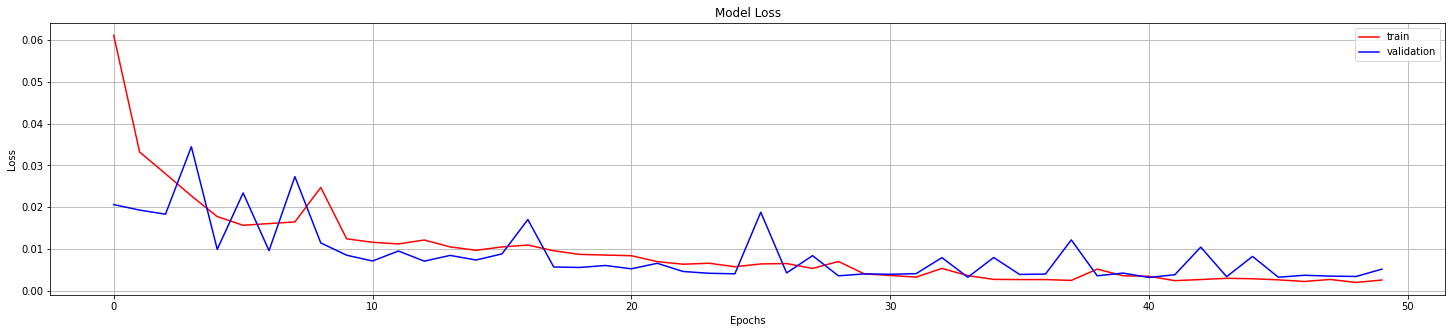

In [39]:
# Plot the Loss Curves

plt.figure(figsize=(25,5))
plt.plot(history_close_price.history['loss'],'r')
plt.plot(history_close_price.history['val_loss'],'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


In [40]:

predict=model.predict(X_test)
predictt = scaler.inverse_transform(predict)
ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [41]:
print("Test data R2 score:", r2_score(ytest, predictt))

Test data R2 score: 0.5352119957537107


In [42]:
k=test_data[len(test_data)-time_step:].reshape(1,-1)
temp=list(k)
temp=temp[0].tolist()
next_day_predict=[]
steps=time_step
for i in range(5):
    if(len(temp)>time_step):
        k=np.array(temp[1:])
        k = k.reshape(1,-1)
        k = k.reshape((1, steps, 1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        temp=temp[1:]
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
    else:
        k = k.reshape((1, steps,1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
               
last_days=np.arange(1,time_step+1)
pre_days=np.arange(time_step+1,time_step+10+1)

print(next_day_predict)
print("--------------------------------------------")
print('last_days are',last_days)
print("--------------------------------------------")
print('pre_days are',pre_days)

[[0.45773863792419434], [0.4067732095718384], [0.36340436339378357], [0.3266199827194214], [0.2949524521827698]]
--------------------------------------------
last_days are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
--------------------------------------------
pre_days are [16 17 18 19 20 21 22 23 24 25]


# prediction

In [43]:
value = np.empty((len(last_days)+11,1))
value[:] = np.nan
value = value.reshape(1,-1).tolist()[0]

real_last_days_value = value
predicted_days_value = value

real_last_days_value[1:time_step+1] = scaler.inverse_transform(khazar_new[len(khazar_new)-time_step:]).reshape(1,-1).tolist()[0]
predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(next_day_predict).reshape(-1,1)).reshape(1,-1).tolist()[0]

plot = pd.DataFrame({
    'real_last_days_value':real_last_days_value,
    'predicted_days_value':predicted_days_value
})

j=cycle(['Last 15 days with indicator of close price ','Predicted next 5 days with indicator of close price '])
fig = px.line(plot,x=plot.index, y=[plot['real_last_days_value'],
                                                      plot['predicted_days_value']],
              labels={'value': 'Stock of indicator price','index': 'Timestamp'},color_discrete_map={
                 "real_last_days_value": "red",
                 "predicted_days_value": "red"})

fig.add_vline(x=15, line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=16, line_width=3, line_dash="dash", line_color="green", fillcolor="blue")
fig.add_hrect(y0=16, y1=20, line_width=0, opacity=0.2)


fig.update_layout(title_text='Compare last 15 days vs next 5 days of khazar stock',
                  plot_bgcolor='white', font_size=13, font_color='black',legend_title_text='Indicators')

fig.for_each_trace(lambda t:  t.update(name = next(j)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

##### Real close_price--> 3 bahman in tsetmc site =7930 , 4 bahmn = 7850   (decrease  <-0.5 we assaign -1 (based on pdf))
##### Real close_price with RSI --> 3 bahman (timestamp=15) in our data =29.33 ,  our model prediction for 4 bahmn(timestamp=16) = 26.40 (decrease < -0.5 we assaign -1 (based on pdf))
##------------------------------------------------------------------------------
### So our accuracy is 100%

## Part 2 prediction with adding social indicators


In [ ]:
khazar_new = khazar_df[['gregorian_date','rsi','rsi_view','sma5','sma5_view']]
#khazar_new = khazar_df[['gregorian_date','close','view']]
#khazar_new = khazar_new[['gregorian_date','close']]

print("Shape of dataframe:", khazar_new.shape)

Shape of dataframe: (186, 5)


In [ ]:
del khazar_new['gregorian_date']
scaler=MinMaxScaler(feature_range=(0,1))
khazar_new=scaler.fit_transform(np.array(khazar_new).reshape(-1,1))


In [ ]:
train_data,test_data,X_train, y_train,X_test,y_test=split(khazar_new, train_size=0.78)
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

train_data:  (580, 1)
test_data:  (164, 1)
X_train:  (564, 15)
y_train:  (564,)
X_test:  (148, 15)
y_test (148,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [ ]:
tf.keras.backend.clear_session()
time_step = 15
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_indicator=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32,verbose=1)


Epoch 1/50
18/18 [==============================] - 9s 132ms/step - loss: 0.0860 - val_loss: 0.0113
Epoch 2/50
18/18 [==============================] - 1s 29ms/step - loss: 0.0837 - val_loss: 0.0088
Epoch 3/50
18/18 [==============================] - 1s 29ms/step - loss: 0.0822 - val_loss: 0.0113
Epoch 4/50
18/18 [==============================] - 1s 28ms/step - loss: 0.0807 - val_loss: 0.0112
Epoch 5/50
18/18 [==============================] - 0s 28ms/step - loss: 0.0786 - val_loss: 0.0067
Epoch 6/50
18/18 [==============================] - 1s 28ms/step - loss: 0.0700 - val_loss: 0.0160
Epoch 7/50
18/18 [==============================] - 1s 28ms/step - loss: 0.0474 - val_loss: 0.0040
Epoch 8/50
18/18 [==============================] - 1s 29ms/step - loss: 0.0402 - val_loss: 0.0115
Epoch 9/50
18/18 [==============================] - 1s 29ms/step - loss: 0.0483 - val_loss: 0.0101
Epoch 10/50
18/18 [==============================] - 1s 28ms/step - loss: 0.0399 - val_loss: 0.0035
Epoch 11

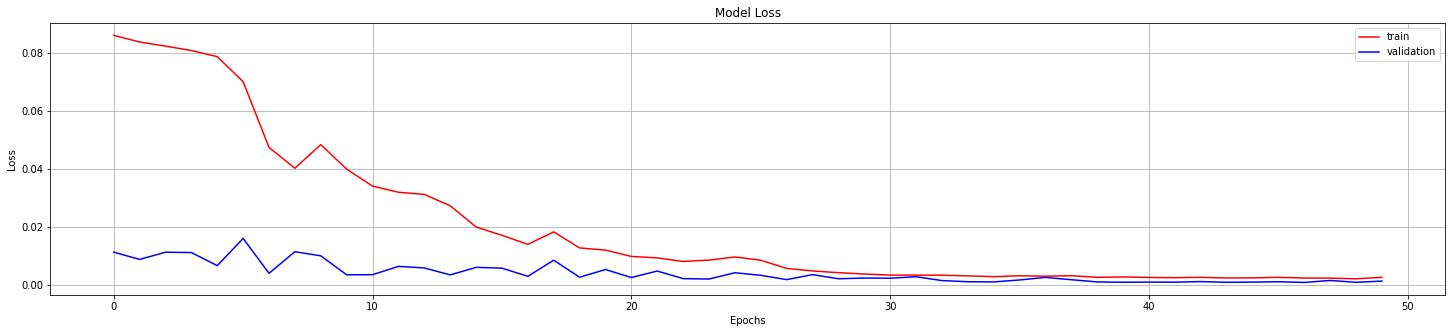

In [ ]:
# Plot the Loss Curves

plt.figure(figsize=(25,5))
plt.plot(history_indicator.history['loss'],'r')
plt.plot(history_indicator.history['val_loss'],'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


In [ ]:

predict=model.predict(X_test)
predictt = scaler.inverse_transform(predict)
ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
print("Test data R2 score:", r2_score(ytest, predictt))

Test data R2 score: 0.8135510171134511


In [ ]:
k=test_data[len(test_data)-time_step:].reshape(1,-1)
temp=list(k)
temp=temp[0].tolist()
next_day_predict=[]
steps=time_step
for i in range(5):
    if(len(temp)>time_step):
        k=np.array(temp[1:])
        k = k.reshape(1,-1)
        k = k.reshape((1, steps, 1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        temp=temp[1:]
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
    else:
        k = k.reshape((1, steps,1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
               
last_days=np.arange(1,time_step+1)
pre_days=np.arange(time_step+1,time_step+10+1)

print(next_day_predict)
print("--------------------------------------------")
print('last_days are',last_days)
print("--------------------------------------------")
print('pre_days are',pre_days)


[[0.015946796163916588], [0.023097772151231766], [0.14130762219429016], [0.06183039769530296], [0.017242979258298874]]
--------------------------------------------
last_days are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
--------------------------------------------
pre_days are [16 17 18 19 20 21 22 23 24 25]


# prediction

In [ ]:
value = np.empty((len(last_days)+11,1))
value[:] = np.nan
value = value.reshape(1,-1).tolist()[0]

real_last_days_value = value
predicted_days_value = value

real_last_days_value[1:time_step+1] = scaler.inverse_transform(khazar_new[len(khazar_new)-time_step:]).reshape(1,-1).tolist()[0]
predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(next_day_predict).reshape(-1,1)).reshape(1,-1).tolist()[0]

plot = pd.DataFrame({
    'real_last_days_value':real_last_days_value,
    'predicted_days_value':predicted_days_value
})

j=cycle(['Last 15 days with indicator of close price and view price','Predicted next 5 days with indicator of close price and view price'])
fig = px.line(plot,x=plot.index, y=[plot['real_last_days_value'],
                                                      plot['predicted_days_value']],
              labels={'value': 'Stock of indicator price','index': 'Timestamp'},color_discrete_map={
                 "real_last_days_value": "red",
                 "predicted_days_value": "red"})

fig.add_vline(x=15, line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=16, line_width=3, line_dash="dash", line_color="green", fillcolor="blue")
fig.add_hrect(y0=16, y1=20, line_width=0, fillcolor="red", opacity=0.2)


fig.update_layout(title_text='Compare last 15 days vs next 5 days of khazar stock',
                  plot_bgcolor='white', font_size=13, font_color='black',legend_title_text='Indicators')

fig.for_each_trace(lambda t:  t.update(name = next(j)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

##### Real close_price--> 3 bahman in tsetmc site =7930 , 4 bahmn = 7850   (decrease  <-0.5 we assaign -1 (based on pdf))
##### Real close_price with socila indicators --> 3 bahman (timestamp=15) in our data =836.5 ,  our model prediction for 4 bahmn(timestamp=16) = 759.60 (decrease < -0.5 we assaign -1 (based on pdf))
##------------------------------------------------------------------------------
### So our accuracy is 100%